## Modelisation TF-IDF
Accès au dossier du projet sur Google Drive

In [1]:
import sys
import os
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive/', force_remount=True)
    %cd drive/MyDrive/nov23_bds_rakuten
else:
    root_files = os.listdir()
    if not "requirements.txt" in root_files:
        print("The jupyter server root should be set to root of git project")
        print("If you're on vscode add the following to your settings.json file")
        print('"jupyter.notebookFileRoot": "${workspaceFolder}"')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Mounted at /content/drive/
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-b57eaba03772>", line 6, in <cell line: 3>
    get_ipython().run_line_magic('cd', 'drive/MyDrive/nov23_bds_rakuten')
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/

Import des librairies

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

from joblib import dump, load

Chargement du fichier source \data\output\preprocessing-lang\X_pre.csv

In [4]:
df = pd.read_csv('output/preprocessing-text/X_preprocess.csv', index_col=0)
display(df.head())

y = pd.read_csv("data/Y_train.csv",index_col=0)
display(y.head())

# Vérifier les dimensions des DataFrames après suppression
print("Dimensions de df :", df.shape)
print("Dimensions de y  :", y.shape)

,productid,imageid,prdtypecode,lang,text
index,,,,,
0,3804725264,1263597046,10,de,olivia punktraster notizbuch design din rosen ...
1,436067568,1008141237,2280,fr,salon encheres barrere art asiatique art journ...
2,201115110,938777978,50,fr,grand marque très élégant confort support game...
3,50418756,457047496,1280,de,doigt disneyland donald peluche europe marionn...
4,278535884,1077757786,2705,fr,tous veut idées chambarde plan luc boule neige...


,prdtypecode
index,
0,10
1,2280
2,50
3,1280
4,2705


Dimensions de df : (84916, 5)
Dimensions de y  : (84916, 1)


# Bag of words

Nettoyage de quelques lignes NaN

Je ne comprends pas l'origine de ces lignes qui n'apparaîssent pas en sortie du préprocessing

In [5]:
# Identifier les lignes où la colonne 'text' contient NaN
lignes_avec_nan = df['text'].isna()

# Afficher les lignes avec NaN
print("\nLignes avec NaN dans la colonne 'text':")
print(df.loc[lignes_avec_nan])

# Supprimer les lignes avec des valeurs NaN
df = df.dropna(subset=['text'])

# Supprimer les lignes correspondantes dans y en utilisant l'index des lignes identifiées dans df
y = y.drop(index = y[lignes_avec_nan].index)

# Vérifier les dimensions des DataFrames après suppression
print("Dimensions de df après suppression :", df.shape)
print("Dimensions de y après suppression :", y.shape)


Lignes avec NaN dans la colonne 'text':
       productid     imageid  prdtypecode lang text
index                                              
40185   50153240   440192430         2280   fr  NaN
62516  158689876   914209691         2403   pt  NaN
69861  819829665  1040948168         2280   fr  NaN
72649  149701771   908306699           10   en  NaN
Dimensions de df après suppression : (84912, 5)
Dimensions de y après suppression : (84912, 1)


Préparation des jeux de données

In [ ]:
X = df.text

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

## Vectorisation

limitation des features car manque mémoire pour gérer plus de 160 000 features (et plus de 80 000 lignes)

In [ ]:
# Créer un vectorisateur
vectorizer = CountVectorizer(max_features = 8000)

# Appliquer CountVectorizer au texte lemmatisé
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)



# Modélisation RFC sans échantillonnaage

## transformation TF-IDF

In [ ]:
# Initialiser le transformateur TF-IDF
tfidf_transformer = TfidfTransformer()

# Appliquer la transformation TF-IDF
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)


## RandomForestClassifier

### Entrainement du modèle rfc, puis stockage

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modele_rfc = RandomForestClassifier(random_state=123)
modele_rfc.fit(X_train_tfidf, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = modele_rfc.predict(X_test_tfidf)

c:\Users\Karim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
# Enregistrer le modèle dans un fichier
dump(modele_rfc, 'c:/Users/Karim/datascientest/rakuten/output/data-modeling-text-1/modele_rfc.joblib')

['c:/Users/Karim/datascientest/rakuten/output/data-modeling-text-1/modele_rfc.joblib']

In [ ]:
# Code pour charger le modèle rfc
modele_rfc = load('c:/Users/Karim/datascientest/rakuten/output/data-modeling-text-1/modele_rfc.joblib')
# Faire des prédictions sur l'ensemble de test
y_pred = modele_rfc.predict(X_test_tfidf)

### Résultats du RFC

Ajout des labels de classe pour visu

In [ ]:
prdcodetype2label = {
    10 : "Livre occasion",
    40 : "Jeu vidéo, accessoire tech.",
    50 : "Accessoire Console",
    60 : "Console de jeu",
    1140 : "Figurine",
    1160 : "Carte Collection",
    1180 : "Jeu Plateau",
    1280 : "Jouet enfant, déguisement",
    1281 : "Jeu de société",
    1300 : "Jouet tech",
    1301 : "Paire de chaussettes",
    1302 : "Jeu extérieur, vêtement",
    1320 : "Autour du bébé",
    1560 : "Mobilier intérieur",
    1920 : "Chambre",
    1940 : "Cuisine",
    2060 : "Décoration intérieure",
    2220 : "Animal",
    2280 : "Revues et journaux",
    2403 : "Magazines, livres et BDs",
    2462 : "Jeu occasion",
    2522 : "Bureautique et papeterie",
    2582 : "Mobilier extérieur",
    2583 : "Autour de la piscine",
    2585 : "Bricolage",
    2705 : "Livre neuf",
    2905 : "Jeu PC",
}

y_test_visu = y_test['prdtypecode'].map(prdcodetype2label)
y_pred_visu = [prdcodetype2label.get(code, "Label") for code in y_pred]


Score du modèle : 0.7751280692457163


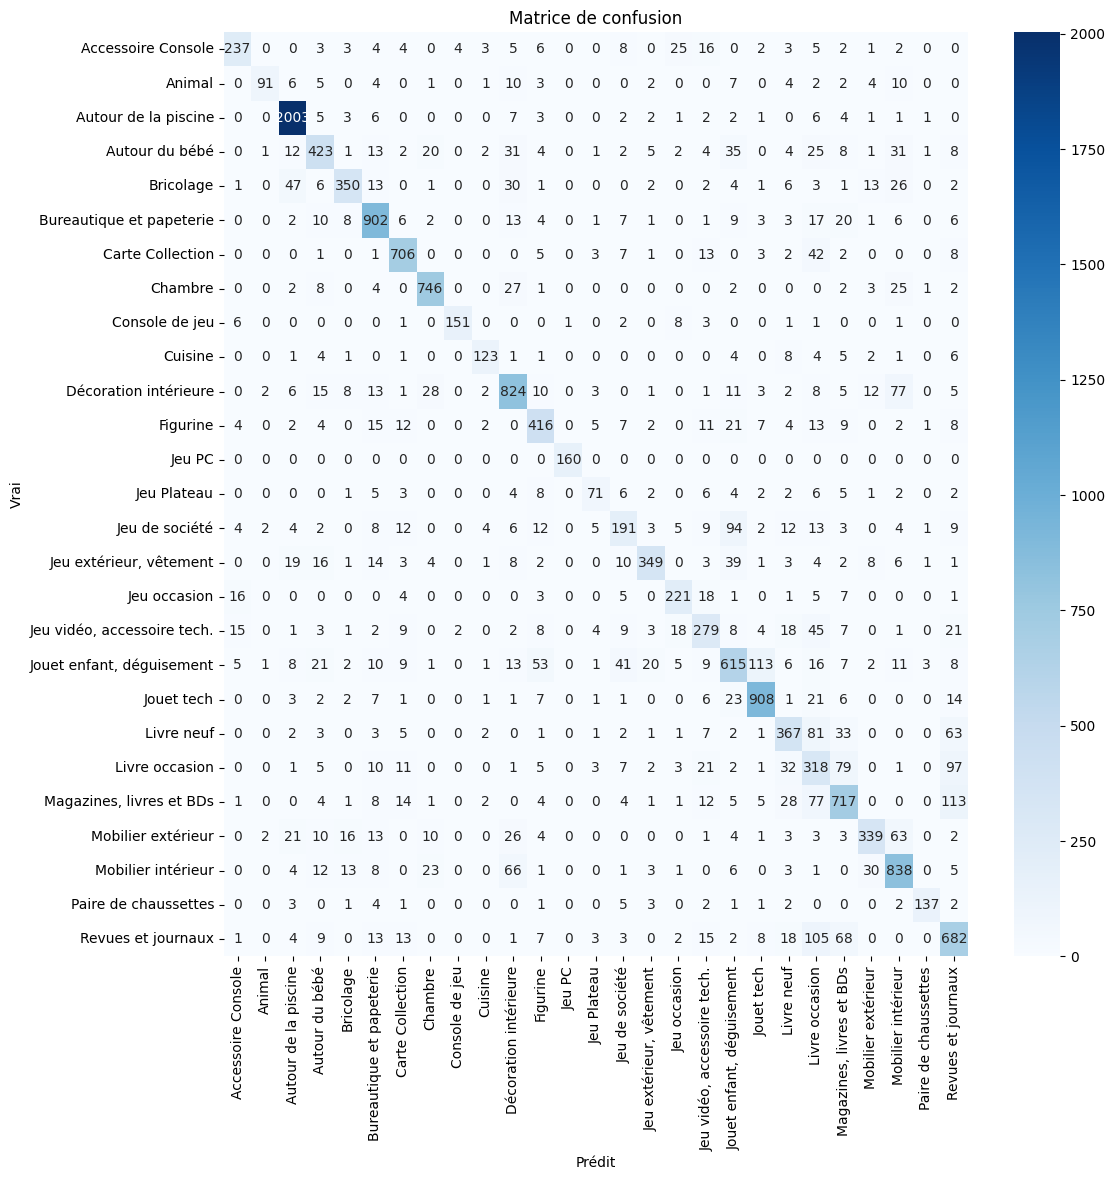

In [ ]:
# Calculer le score du modèle
score = accuracy_score(y_test_visu, y_pred_visu)
print("Score du modèle :", score)

# Créer et afficher la matrice de confusion
mat_conf = pd.crosstab(y_test_visu, y_pred_visu)

plt.figure(figsize=(12, 12))
sns.heatmap(mat_conf, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.show()

In [ ]:
print(classification_report(y_test_visu, y_pred_visu))

                             precision    recall  f1-score   support

         Accessoire Console       0.82      0.71      0.76       333
                     Animal       0.92      0.60      0.73       152
       Autour de la piscine       0.93      0.98      0.95      2050
             Autour du bébé       0.74      0.67      0.70       636
                  Bricolage       0.85      0.69      0.76       509
   Bureautique et papeterie       0.84      0.88      0.86      1022
           Carte Collection       0.86      0.89      0.88       794
                    Chambre       0.89      0.91      0.90       823
             Console de jeu       0.96      0.86      0.91       175
                    Cuisine       0.85      0.76      0.80       162
      Décoration intérieure       0.77      0.79      0.78      1037
                   Figurine       0.73      0.76      0.75       545
                     Jeu PC       0.99      1.00      1.00       160
                Jeu Plateau      

Fonction pour faire des prédictions

In [ ]:
def predict_modele_rfc(text):
    # Créer un DataFrame de test
    df_test = pd.DataFrame({'texte': [text]})
    # Vectorisation
    X_phrase = vectorizer.transform(df_test['texte'])
    X_phrase_tfidf = tfidf_transformer.transform(X_phrase)
    # Prédiction
    y_phrase = modele_rfc.predict(X_phrase_tfidf)

    return print("Prédiction pour le texte :", text, "\n ->", prdcodetype2label[y_phrase[0]])

Test de prédiction :

In [ ]:
phrase = "Moakoada®Abs Congélateur Teether Sensorielle Jouet Pour 0 À 12 Mois Les Bébés - ABS congélateur Teether sensorielle Jouet pour 0 à 12 mois les bébés Présentation du produit: soulagez votre TEETHING BÉBÉ ET MALAISE DE LA DOULEUR - rehausseurs sont maman et de papa de lifesavers pendant l'étape de dentition. Ils fonctionnent comme des sucettes mais encore mieux avec les courbes et les textures qui massent les gencives de vos enfants et de stimuler la croissance de leurs dents. AIDER ENCOURAGER LE DÉVELOPPEMENT DU CERVEAU ET L'APPRENTISSAGE TACTILE - Chaque bébé a une teether conception colorée d'amusement et la texture qui fait vraiment bon pour bébé jouets sensorielles. Mis à part qu'ils sont amusants à jouer ils offrent également l'apprentissage visuel et tactile sans danger pour bébé. Ce jouet pour bébé sucette a une conception solide ou n'a pas de petites pièces à mordre il est certainement bébés. AVEC FONCTION CONÇU DANS L'ESPRIT - Le bébé jouet de dentition s'adapte parfaitement dans la bouche de votre bébé mais il est juste la bonne taille pour ne pas poser un risque d'étouffement. Les poignées sont conçus de sorte qu'ils peuvent être facilement saisis par les petites mains. La conception fonctionnelle rend également chaque teether très facile à nettoyer et à ranger. ABS matériau non toxique est adopté ce qui peut être bouillie à emballage haute température: un ensemble de 10 pièces de bébé Conseils Teether: Cuites à haute température pendant moins d'une demi-minute Ne pas utiliser l'eau froide pour refroidir immédiatement après la désinfection sinon il provoque une déformation du produit. sinon il causera la déformation du produit. sinon il causera la déformation du produit."
predict_modele_rfc(phrase)

phrase = "Lot de 8 préfiltres jetables pour panier de skimmer - Marina - Lots de 8 pré-filtres jetables de la marque Marina. Universels ils sont compatibles avec touts les paniers de skimmer mesurant jusqu'à 40 cm de diamètre."
predict_modele_rfc(phrase)

phrase = "Mario Kart 8 Deluxe Switch - Jeu video Nintendo Switch Bananes et carapaces sur place ou à emporter !"
predict_modele_rfc(phrase)

phrase = "du texte au pif avec une pelle pour faire penser au jardin"
predict_modele_rfc(phrase)

phrase = "Avec une pelle pour faire penser au jardin"
predict_modele_rfc(phrase)

phrase = "Avec une pelle près de la piscine pour faire penser au jardin"
predict_modele_rfc(phrase)

Prédiction pour le texte : Moakoada®Abs Congélateur Teether Sensorielle Jouet Pour 0 À 12 Mois Les Bébés - ABS congélateur Teether sensorielle Jouet pour 0 à 12 mois les bébés Présentation du produit: soulagez votre TEETHING BÉBÉ ET MALAISE DE LA DOULEUR - rehausseurs sont maman et de papa de lifesavers pendant l'étape de dentition. Ils fonctionnent comme des sucettes mais encore mieux avec les courbes et les textures qui massent les gencives de vos enfants et de stimuler la croissance de leurs dents. AIDER ENCOURAGER LE DÉVELOPPEMENT DU CERVEAU ET L'APPRENTISSAGE TACTILE - Chaque bébé a une teether conception colorée d'amusement et la texture qui fait vraiment bon pour bébé jouets sensorielles. Mis à part qu'ils sont amusants à jouer ils offrent également l'apprentissage visuel et tactile sans danger pour bébé. Ce jouet pour bébé sucette a une conception solide ou n'a pas de petites pièces à mordre il est certainement bébés. AVEC FONCTION CONÇU DANS L'ESPRIT - Le bébé jouet de dentiti

# Modélisation RFC avec échantillonnaage

### Sous-échantillonnage et Sur-échantillonnage

In [ ]:
# On ne garde que la colonne text pour la suite
X = pd.DataFrame(df.text)

In [ ]:
!pip install imblearn

You should consider upgrading via the 'c:\users\karim\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Sous-échantillonnage

In [ ]:
# Limite pour la classe sur-représentée
under_strategy  = {2583: 5500}
# Appliquer le sous-échantillonnage
under_sampler = RandomUnderSampler(sampling_strategy = under_strategy)
X_res_under, y_res_under = under_sampler.fit_resample(X, y)

Sur-échantillonnage

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Équilibrer les classes dans l'ensemble d'entraînement
ros = RandomOverSampler(random_state=123)
X_sampl, y_sampl = ros.fit_resample(X_res_under, y_res_under)

# Vérifier les dimensions des DataFrames après traitement
print("Dimensions de X_sampl :", X_sampl.shape)
print("Dimensions de y_sampl :", y_sampl.shape)

c:\Users\Karim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Préparation des jeux de données

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sampl, y_sampl, test_size = 0.2, random_state = 123)

## Vectorisation

In [ ]:
# Créer un vectorisateur
vectorizer = CountVectorizer(max_features = 8000)

# Appliquer CountVectorizer au texte lemmatisé
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


## transformation TF-IDF

In [ ]:
# Initialiser le transformateur TF-IDF
tfidf_transformer = TfidfTransformer()

# Appliquer la transformation TF-IDF
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)


### Entrainement du modèle rfc

In [ ]:
modele_rfc = RandomForestClassifier(random_state=123)
modele_rfc.fit(X_train_tfidf, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = modele_rfc.predict(X_test_tfidf)

Score du modèle : 0.7748336571865984


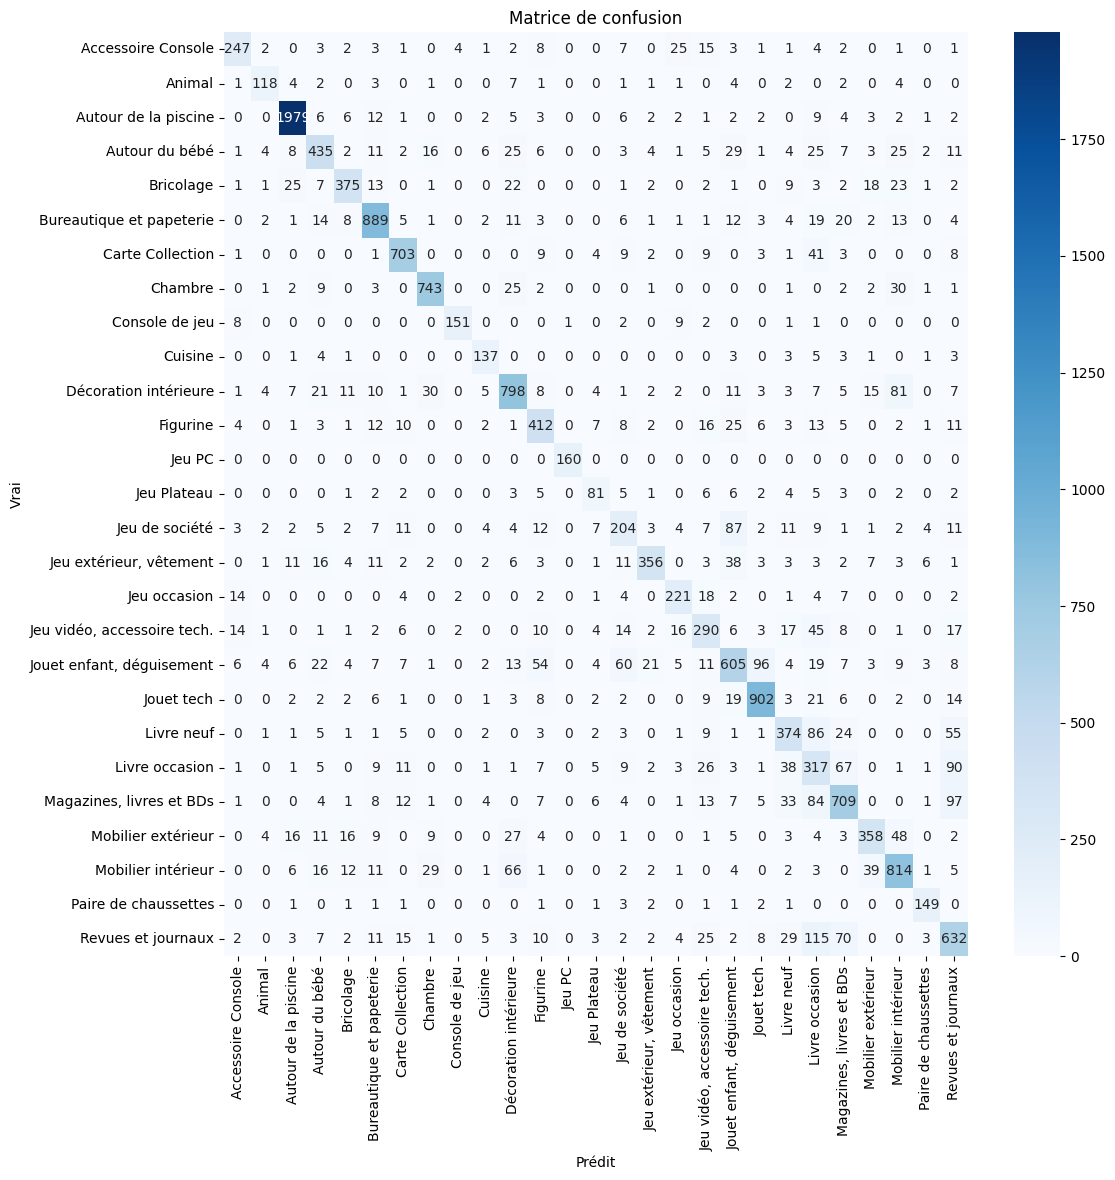

In [ ]:
# Remplacer les labels
y_test_visu = y_test['prdtypecode'].map(prdcodetype2label)
y_pred_rf_ros_visu = [prdcodetype2label.get(code, "Label") for code in y_pred_rf_ros]

# Calculer le score du modèle
score = accuracy_score(y_test_visu, y_pred_rf_ros_visu)
print("Score du modèle :", score)

# Créer et afficher la matrice de confusion
mat_conf = pd.crosstab(y_test_visu, y_pred_rf_ros_visu)

plt.figure(figsize=(12, 12))
sns.heatmap(mat_conf, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.show()

Le résultat n'est pas meilleur avec l'over sampling
La classe piscine étant 10 fois plus représentée, il convient surement de la rééchantillonner à la baisse avant